**Project Objective:**

The objective is to analyze and predict player engagement based on their online gaming behavior. This analysis focuses on:
1. Determine factors like session duration, player level, and gaming frequency that influence engagement, while suggesting tailored interventions such as rewards, challenges, or personalized recommendations to boost retention and enhance the overall gaming experience.
2. Build models to classify players into engagement levels (Low, Medium, High) with high accuracy and interpretability.

This analysis aims to improve game design, marketing strategies, and player retention.

Dataset taken from Kaggle:

Rabie El Kharoua. (2024). Predict Online Gaming Behavior Dataset [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/8742674

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gaming_df = pd.read_csv("online_gaming_behavior_dataset.csv")
gaming_df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [3]:
gaming_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

**Dataset Info:**

**Size:** 40,034 rows and 13 columns.

**Features:** *Numerical (7):* Directly usable.
        *Categorical (5):* Requires encoding for predictive modeling.
        
**Target:** *EngagementLevel:* Classified as High, Medium, or Low.

In [4]:
gaming_df.describe()

,PlayerID,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,11556.964675,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,9000.000000,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,19008.250000,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,29016.500000,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,39024.750000,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49033.000000,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [5]:
gaming_df.isnull().sum()

PlayerID                     0
Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64

Missing Values: 0

In [6]:
gaming_df.duplicated().sum()

np.int64(0)

Duplicate Values: 0

**Exploratory Data Analysis and Visualization**

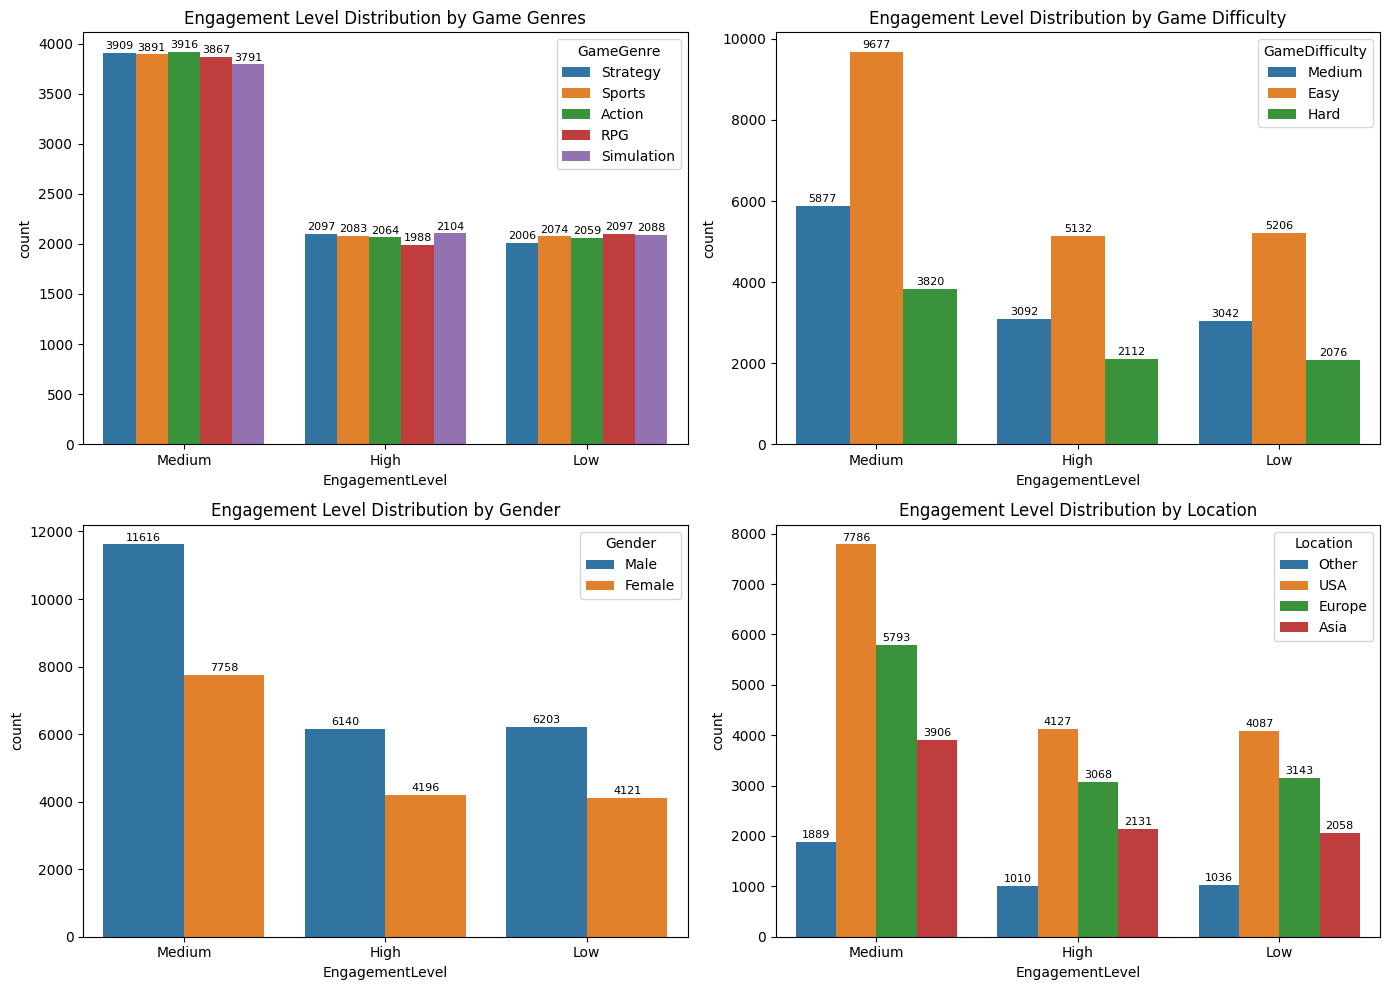

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.countplot(x='EngagementLevel', hue='GameGenre', data=gaming_df, ax=axes[0, 0])
axes[0, 0].set_title("Engagement Level Distribution by Game Genres")

sns.countplot(x='EngagementLevel', hue='GameDifficulty', data=gaming_df, ax=axes[0, 1])
axes[0, 1].set_title("Engagement Level Distribution by Game Difficulty")

sns.countplot(x='EngagementLevel', hue='Gender', data=gaming_df, ax=axes[1, 0])
axes[1, 0].set_title("Engagement Level Distribution by Gender")

sns.countplot(x='EngagementLevel', hue='Location', data=gaming_df, ax=axes[1, 1])
axes[1, 1].set_title("Engagement Level Distribution by Location")

for ax in axes.flat:
    for p in ax.patches:
        count = int(p.get_height())
        if count > 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', fontsize=8, color='black',
                        xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

**Insights from Categorical Columns vs Engagement Level**

***1. Engagement Level Distribution by Game Genres:***

Percentages:
| Genre | High(%) | Med(%) | Low(%) |
| ----- | ------- | ------ | ------ |      
| Strategy | 26.2 | 48.8 | 25 |
| Sports | 25.9 | 48.4 | 25.8 |
| Action | 25.7 | 48.7 | 25.6 |
| RPG | 25 | 48.6 | 26.4 |
| Simulation | 26.4 | 47.5 | 26.2 |
   
**Observations:** 
1. Strategy and Simulation games show the highest percentage of players with high engagement.
2. RPG games have the highest low engagement percentage (26.4 %)
                 
**Suggestions:** 
1. Use the successful features of Strategy and Simulation games as a guide to improve engagement in other genres.
2. Game features should improved for RPG players to increase engagement.

***2. Engagement Level Distribution by Game Difficulty:***

Percentages:
| Difficulty | High(%) | Med(%) | Low(%) |
| ---------- | ------- | ------ | ------ |      
| Easy | 25.6 | 48.4 | 26 |
| Medium | 25.7 | 48.9 | 25.3 |
| Hard | 26.4 | 47.7 | 25.9 |

**Observations:** 
1. The count for Easy difficulty is the highest across all Engagement levels, indicating that casual games are more preferable.
2. Hard difficulty players have the highest proportion of high engagement (26.4 %).
3. The percentage of Easy difficulty is the highest for low engagement (26 %).

**Suggestions:** 
1. Games should be made progressively harder and more challenging with better reward systems to retain players.

***3. Engagement Level Distribution by Gender:***

Percentages:
| Gender | High(%) | Med(%) | Low(%) |
| ------ | ------- | ------ | ------ |      
| Male | 25.6 | 48.5 | 25.9 |
| Female | 26.1 | 48.3 | 25.6 |

**Observations:** 
1. Male has the highest count across all engagement levels, indicating that the player base is male dominant.
2. Females have higher percentage of high level engagement and males have higher percentage of low level engagement.

**Suggestions:** 
1. Marketing campaigns and game features could be refined to better engage female players. Strategies could involve creating female-focused narratives, characters, and gameplay elements.

***4. Engagement Level Distribution by Location:***

Percentages: 
| Location | High(%) | Med(%) | Low(%) |
| -------- | ------- | ------ | ------ |      
| Other | 25.7 | 48 | 26.3 |
| USA | 25.8 | 48.7 | 25.5 |
| Europe | 25.6 | 48.3 | 26.2 |
| Asia | 26.3 | 48.3 | 25.4 |

**Observations:** 
1. Majority of the players are from USA. 2. Players from Asia show highest percentage of high engagement (26.3 %).

**Suggestions:** 
1. Increase the player base in Asia, Europe and Other locations by carrying out localized campaigns and promotions and by adding game features that can resonate with players from those regions. 
2. Provide exclusive rewards to players and organize events like tournaments in Asia, Europe and Other locations to get high engagement.

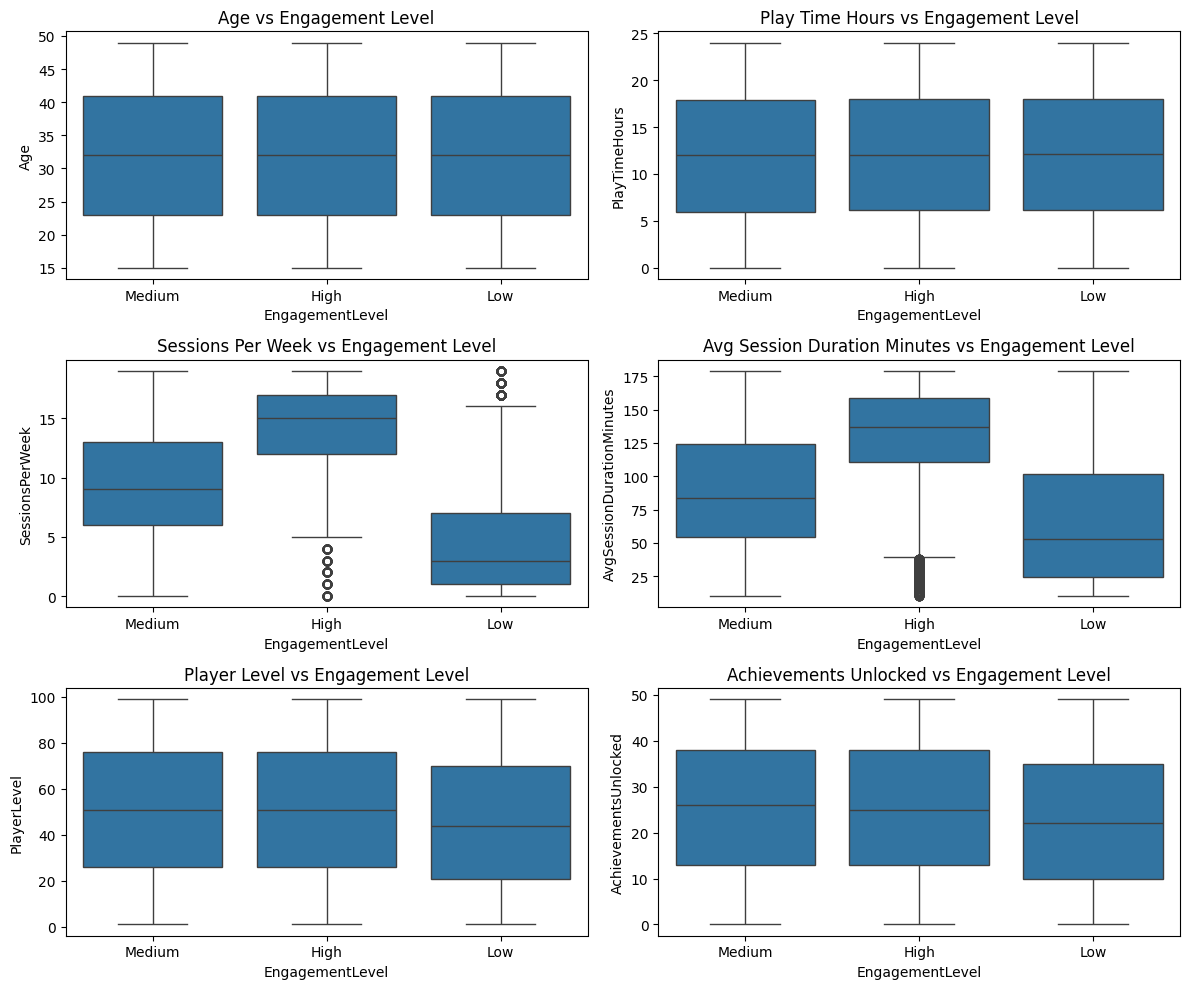

In [8]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

sns.boxplot(x='EngagementLevel', y='Age', data=gaming_df, ax=axes[0, 0])
axes[0, 0].set_title("Age vs Engagement Level")

sns.boxplot(x='EngagementLevel', y='PlayTimeHours', data=gaming_df, ax=axes[0, 1])
axes[0, 1].set_title("Play Time Hours vs Engagement Level")

sns.boxplot(x='EngagementLevel', y='SessionsPerWeek', data=gaming_df, ax=axes[1, 0])
axes[1, 0].set_title("Sessions Per Week vs Engagement Level")

sns.boxplot(x='EngagementLevel', y='AvgSessionDurationMinutes', data=gaming_df, ax=axes[1, 1])
axes[1, 1].set_title("Avg Session Duration Minutes vs Engagement Level")

sns.boxplot(x='EngagementLevel', y='PlayerLevel', data=gaming_df, ax=axes[2, 0])
axes[2, 0].set_title("Player Level vs Engagement Level")

sns.boxplot(x='EngagementLevel', y='AchievementsUnlocked', data=gaming_df, ax=axes[2, 1])
axes[2, 1].set_title("Achievements Unlocked vs Engagement Level")

plt.tight_layout()
plt.show()

**Insights from Numerical Columns vs Engagement Level**

***1. Age:*** The age distribution remains consistent across all engagement levels, with most players falling within the 20–40 age range. Age does not significantly impact engagement levels.

***2. Play Time:*** Players with higher engagement levels tend to have longer playtime. Highly engaged players showing the longest playtime.

***3. Sessions Per Week:*** Players with higher engagement levels tend to log more sessions per week. Players who engage highly log in 12 - 17 times per week.

***4. Avg Session Duration:*** Players with high engagement levels tend to have longer session durations. Less engaged players are more evenly distributed across shorter session durations.

***5. Player Level:*** Higher player levels indicate deeper gameplay involvement, which is associated with high and moderate engagement.

***6. Achievements Unlocked:*** Players with high and moderate engagement levels tend to unlock significantly more achievements.

**Suggestions:** 
1. Introduce daily challenges, limited-time events, or login bonuses to incentivize players to log in and play more frequently.
2. Create more challenging content and rewards to encourage players to reach higher levels, resulting in deeper gameplay involvement and engagement.

Preprocessing and Correlation:

Non-numerical features are encoded as numerical values using One-Hot or Label Encoding to derive the correlation matrix of the entire Dataframe. After that, the correlation of all the features with EngagementLevel is determined to find out which of the features correlate strongly with our Target.

In [9]:
# Encoding the 'EngagementLevel' column as numerical values using Label Encoding
gaming_df['EngagementLevel'] = gaming_df['EngagementLevel'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Encoding Gender using Label Encoding
gaming_df['Gender'] = gaming_df['Gender'].map({'Male': 0, 'Female': 1})
    
# Encoding Location using One-Hot Encoding
gaming_df = pd.get_dummies(gaming_df, columns=['Location'], drop_first=True, prefix='Location')
    
# Encoding GameGenre using One-Hot Encoding
gaming_df = pd.get_dummies(gaming_df, columns=['GameGenre'], drop_first=True, prefix='Genre')
    
# Encoding GameDifficulty using Label Encoding 
gaming_df['GameDifficulty'] = gaming_df['GameDifficulty'].map({'Easy': 1, 'Medium': 2, 'Hard': 3})

In [10]:
gaming_df.head()

,PlayerID,Age,Gender,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,Location_Europe,Location_Other,Location_USA,Genre_RPG,Genre_Simulation,Genre_Sports,Genre_Strategy
0,9000,43,0,16.271119,0,2,6,108,79,25,1,False,True,False,False,False,False,True
1,9001,29,1,5.525961,0,2,5,144,11,10,1,False,False,True,False,False,False,True
2,9002,22,1,8.223755,0,1,16,142,35,41,2,False,False,True,False,False,True,False
3,9003,35,0,5.265351,1,1,9,85,57,47,1,False,False,True,False,False,False,False
4,9004,33,0,15.531945,0,2,2,131,95,37,1,True,False,False,False,False,False,False


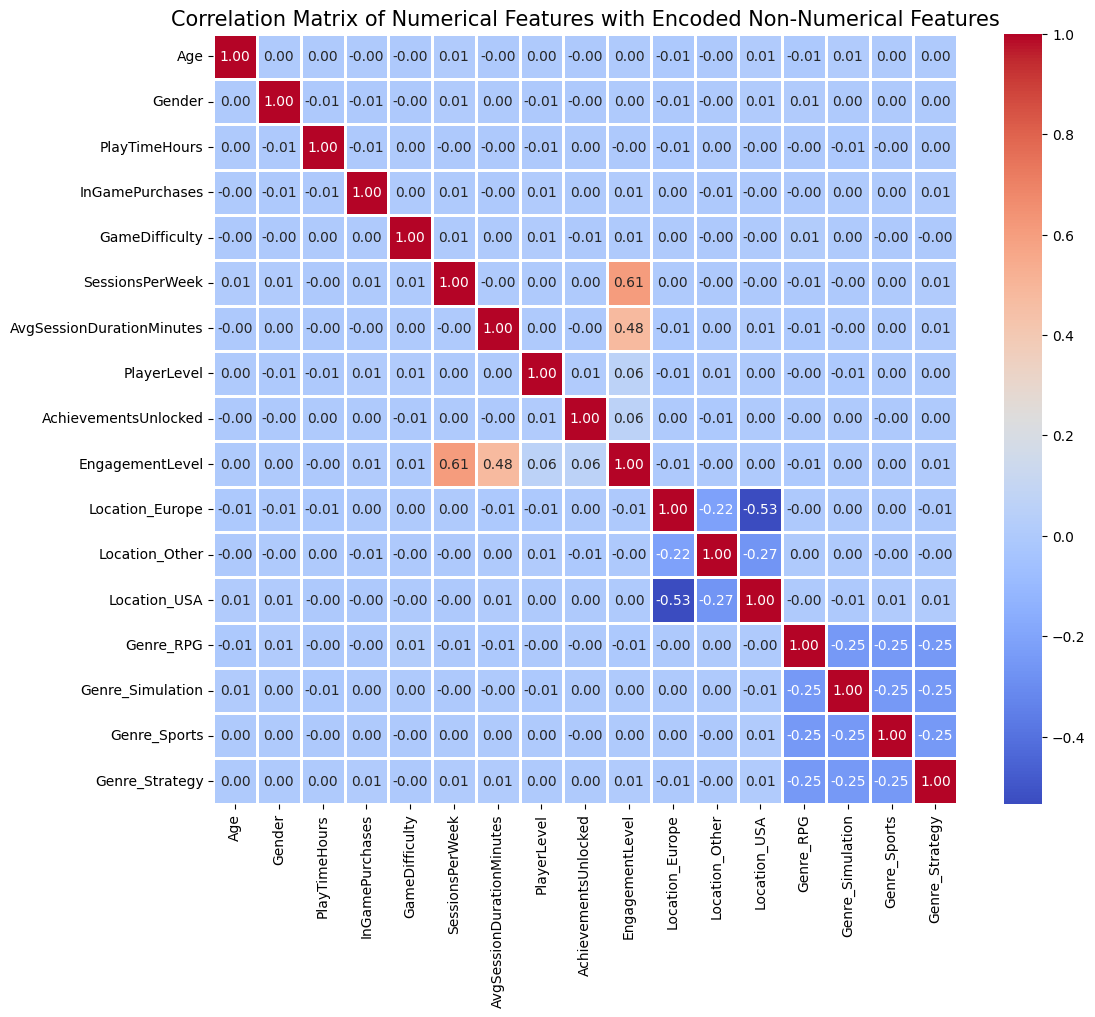

In [11]:
corr_matrix = gaming_df.drop(columns=['PlayerID'], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt= '.2f', linewidths=1)

plt.title('Correlation Matrix of Numerical Features with Encoded Non-Numerical Features', fontsize=15)
plt.show()

In [12]:
corr_with_EngagementLevel = gaming_df.drop(['PlayerID'], axis=1).corrwith(gaming_df['EngagementLevel']).sort_values(ascending=False)
corr_with_EngagementLevel = pd.DataFrame(corr_with_EngagementLevel, columns=["Correlation with EngagementLevel"])
corr_with_EngagementLevel

,Correlation with EngagementLevel
EngagementLevel,1.000000
SessionsPerWeek,0.605996
AvgSessionDurationMinutes,0.476698
AchievementsUnlocked,0.060576
PlayerLevel,0.059315
InGamePurchases,0.008209
Genre_Strategy,0.007700
GameDifficulty,0.005057
Gender,0.004978
Location_USA,0.002499


**Strong Correlation:** SessionsPerWeek (0.606): This feature shows the strongest correlation with EngagementLevel, suggesting that players with more sessions per week tend to have higher engagement levels.

**Medium Correlation:** AvgSessionDurationMinutes (0.477): Players with longer session durations are more likely to exhibit higher engagement levels.

**Weak Correlations:** AchievementsUnlocked (0.061) and PlayerLevel (0.059): Unlocking achievements and reaching higher player levels show a weak but positive correlation, indicating a modest impact on engagement.

Correlations of rest of the features with EngagementLevel are close to Zero, which indicates that these features have little to no direct impact on engagement.

**Machine Learning Model Selection and Evaluation**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = gaming_df.drop(columns=['PlayerID', 'EngagementLevel'], axis=1)
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

X = scaled_features_df
y = gaming_df['EngagementLevel']

# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
# Trying Logistic Regression Model.

LR_model = LogisticRegression(max_iter=3000)
LR_model.fit(X_train, y_train)
LR_pred = LR_model.predict(X_test)

print("Confusion Matrix for Logistic Regression Model:")
print("\n")
print(confusion_matrix(y_test, LR_pred))
print("\n")
print("Classification Report for Logistic Regression Model:")
print("\n")
print(classification_report(y_test, LR_pred))

Confusion Matrix for Logistic Regression Model:


[[1468  565   60]
 [ 296 3434  149]
 [  58  305 1672]]


Classification Report for Logistic Regression Model:


              precision    recall  f1-score   support

           0       0.81      0.70      0.75      2093
           1       0.80      0.89      0.84      3879
           2       0.89      0.82      0.85      2035

    accuracy                           0.82      8007
   macro avg       0.83      0.80      0.81      8007
weighted avg       0.82      0.82      0.82      8007



In [16]:
# Trying Linear SVC Model (Support Vector Machines).

LSVC_model = LinearSVC()
LSVC_model.fit(X_train, y_train)
LSVC_pred = LSVC_model.predict(X_test)

print("Confusion Matrix for Linear SVC Model:")
print("\n")
print(confusion_matrix(y_test, LSVC_pred))
print("\n")
print("Classification Report for Linear SVC Model:")
print("\n")
print(classification_report(y_test, LSVC_pred))

Confusion Matrix for Linear SVC Model:


[[1504  522   67]
 [ 297 3348  234]
 [  64  252 1719]]


Classification Report for Linear SVC Model:


              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2093
           1       0.81      0.86      0.84      3879
           2       0.85      0.84      0.85      2035

    accuracy                           0.82      8007
   macro avg       0.82      0.81      0.81      8007
weighted avg       0.82      0.82      0.82      8007



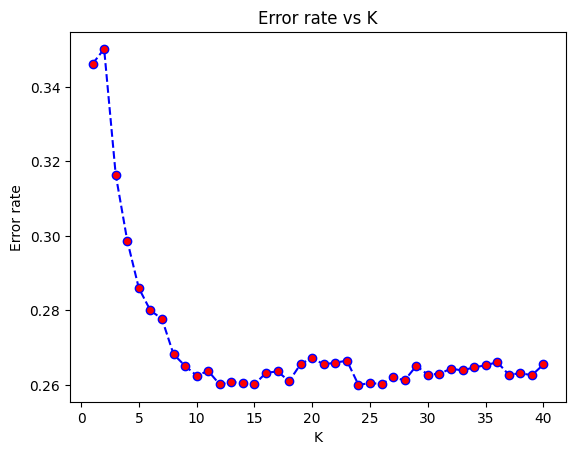

In [17]:
# Trying K Nearest Neighbors Model.

# Using Elbow method to find the best value for n_neighbors parameter
error_rate = []
for i in range(1,41):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    KNN_pred = KNN_model.predict(X_test)
    error_rate.append(np.mean(KNN_pred != y_test))
    
plt.plot(range(1,41), error_rate, marker= "o", color="blue",
         linestyle="--", markerfacecolor="red",markersize=6)
plt.xlabel("K")
plt.ylabel("Error rate")
plt.title("Error rate vs K")

plt.show()

In [18]:
# Best K value = 24. Using KNN model at K = 24.

KNN_model = KNeighborsClassifier(n_neighbors=24)
KNN_model.fit(X_train, y_train)
KNN_pred = KNN_model.predict(X_test)

print("Confusion Matrix for KNN Model:")
print("\n")
print(confusion_matrix(y_test, KNN_pred))
print("\n")
print("Classification Report for KNN Model:")
print("\n")
print(classification_report(y_test, KNN_pred))

Confusion Matrix for KNN Model:


[[ 977 1067   49]
 [ 147 3615  117]
 [  37  665 1333]]


Classification Report for KNN Model:


              precision    recall  f1-score   support

           0       0.84      0.47      0.60      2093
           1       0.68      0.93      0.78      3879
           2       0.89      0.66      0.75      2035

    accuracy                           0.74      8007
   macro avg       0.80      0.68      0.71      8007
weighted avg       0.77      0.74      0.73      8007



In [19]:
# Trying Random Forest Model.

RF_model = RandomForestClassifier(n_estimators=200)
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)

print("Confusion Matrix for Random Forest Model:")
print("\n")
print(confusion_matrix(y_test, RF_pred))
print("\n")
print("Classification Report for Random Forest Model:")
print("\n")
print(classification_report(y_test, RF_pred))

Confusion Matrix for Random Forest Model:


[[1832  202   59]
 [ 112 3671   96]
 [  70  200 1765]]


Classification Report for Random Forest Model:


              precision    recall  f1-score   support

           0       0.91      0.88      0.89      2093
           1       0.90      0.95      0.92      3879
           2       0.92      0.87      0.89      2035

    accuracy                           0.91      8007
   macro avg       0.91      0.90      0.90      8007
weighted avg       0.91      0.91      0.91      8007



**Evaluation:**
After training , testing and evaluating the above 4 models, we can clearly see that "Random Forest Classifier" model performs the best across all metrics. Its accuracy is 0.91, which is the highest among all 4 models. This model provides the most accurate predictions for EngagementLevel.

"Logistic Regression" and "Linear SVC" models achieve the highest accuracy after the "Random Forest" model. These 2 models perform very similiarly across all metrics and their accuracy is 0.82.

"K Nearest Neighbor" model performs the worst in our case with an accuracy of 0.74.

**Best Model:** Random Forest Classifier